<a href="https://colab.research.google.com/github/BarryS27/Me.archive/blob/main/ap-microecon/assets/ap_microecon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

sns.set_theme(style="whitegrid")

plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.figsize': (10, 6)
})

c = sns.color_palette("muted")

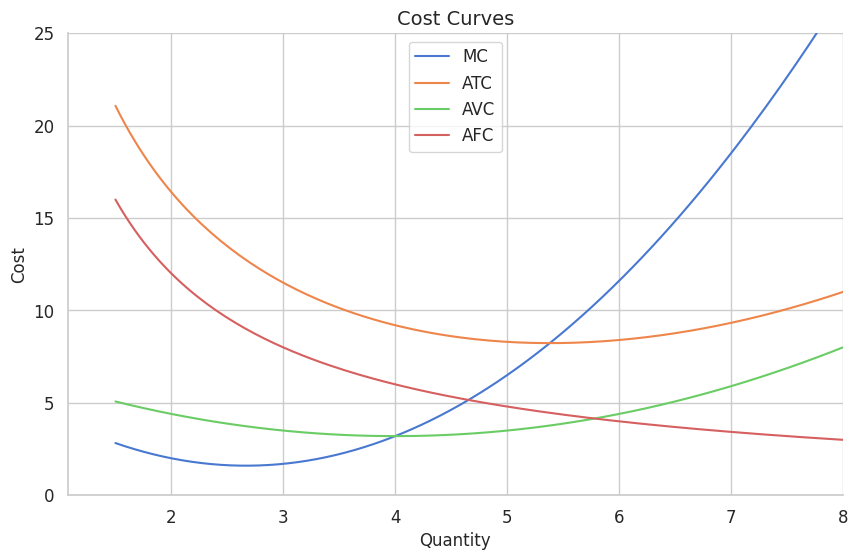

In [3]:
q = np.linspace(1.5, 10, 200)
mc = 0.9*q**2 - 4.8*q + 8
avc = 0.3*q**2 - 2.4*q + 8
afc = 24/q
atc = avc + afc

plt.figure()
sns.lineplot(x=q, y=mc, color=c[0], label='MC')
sns.lineplot(x=q, y=atc, color=c[1], label='ATC')
sns.lineplot(x=q, y=avc, color=c[2], label='AVC')
sns.lineplot(x=q, y=afc, color=c[3], label='AFC')

plt.title("Cost Curves")
plt.xlabel("Quantity")
plt.ylabel("Cost")
plt.xlim(right=8)
plt.ylim(0, 25)
plt.show()

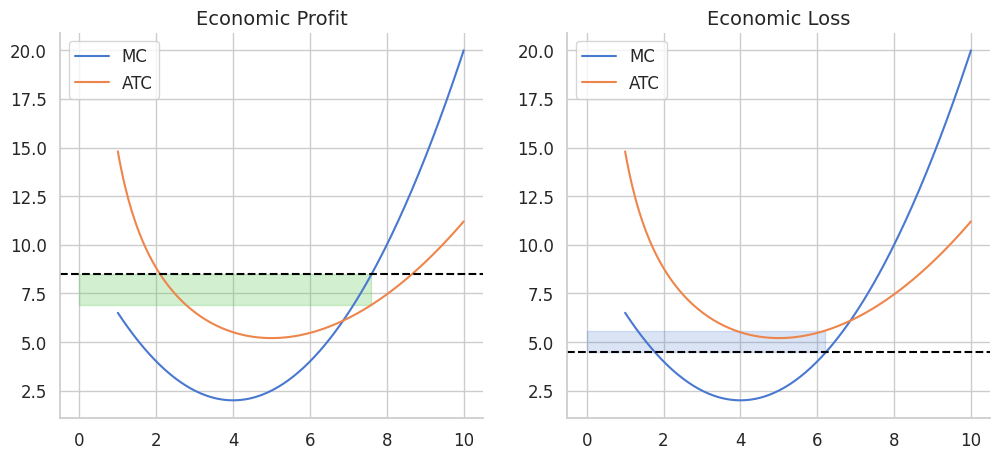

In [4]:
q = np.linspace(1, 10, 200)
mc = 0.5 * (q - 4)**2 + 2
atc = 0.2 * (q - 4)**2 + 3 + 10/q

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=q, y=mc, ax=ax1, color=c[0], label='MC')
sns.lineplot(x=q, y=atc, ax=ax1, color=c[1], label='ATC')
ax1.axhline(8.5, color='black', ls='--', label='P=MR')

q_p = 7.6
atc_p = 0.2 * (q_p - 4)**2 + 3 + 10/q_p
ax1.fill_between([0, q_p], atc_p, 8.5, color=c[2], alpha=0.3)
ax1.set_title("Economic Profit")

sns.lineplot(x=q, y=mc, ax=ax2, color=c[0], label='MC')
sns.lineplot(x=q, y=atc, ax=ax2, color=c[1], label='ATC')
ax2.axhline(4.5, color='black', ls='--', label='P=MR')

q_l = 6.2
atc_l = 0.2 * (q_l - 4)**2 + 3 + 10/q_l
ax2.fill_between([0, q_l], 4.5, atc_l, color=c[0], alpha=0.2)
ax2.set_title("Economic Loss")

plt.show()

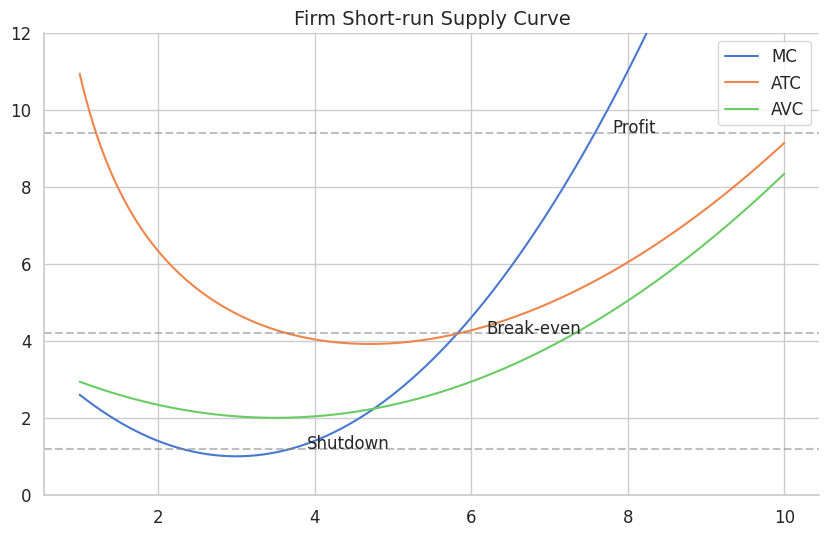

In [5]:
q = np.linspace(1, 10, 200)

plt.figure()
sns.lineplot(x=q, y=0.4*(q-3)**2+1, color=c[0], label='MC')
sns.lineplot(x=q, y=0.15*(q-3.5)**2+2+8/q, color=c[1], label='ATC')
sns.lineplot(x=q, y=0.15*(q-3.5)**2+2, color=c[2], label='AVC')

points = [(1.2, 3.7, 'Shutdown'), (4.2, 6.0, 'Break-even'), (9.4, 7.6, 'Profit')]
for p, qx, lbl in points:
    plt.axhline(p, color='grey', alpha=0.5, ls='--')
    plt.text(qx + 0.2, p, lbl)

plt.title("Firm Short-run Supply Curve")
plt.ylim(0, 12)
plt.show()

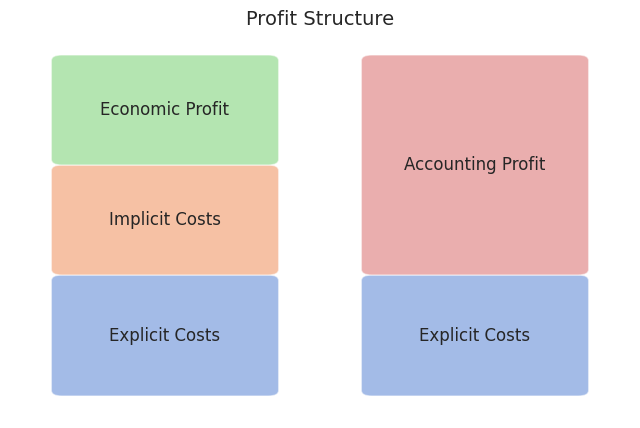

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')

blocks = [
    (0, 0, 2, 2, 'Explicit Costs', c[0]),
    (0, 2.2, 2, 1.8, 'Implicit Costs', c[1]),
    (0, 4.2, 2, 1.8, 'Economic Profit', c[2]),
    (3, 0, 2, 2, 'Explicit Costs', c[0]),
    (3, 2.2, 2, 3.8, 'Accounting Profit', c[3])
]

for x, y, w, h, txt, col in blocks:
    ax.add_patch(FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1", fc=col, alpha=0.5))
    ax.text(x + w/2, y + h/2, txt, ha='center', va='center')

plt.title("Profit Structure")
plt.xlim(-0.5, 5.5); plt.ylim(-0.5, 6.5)
plt.show()

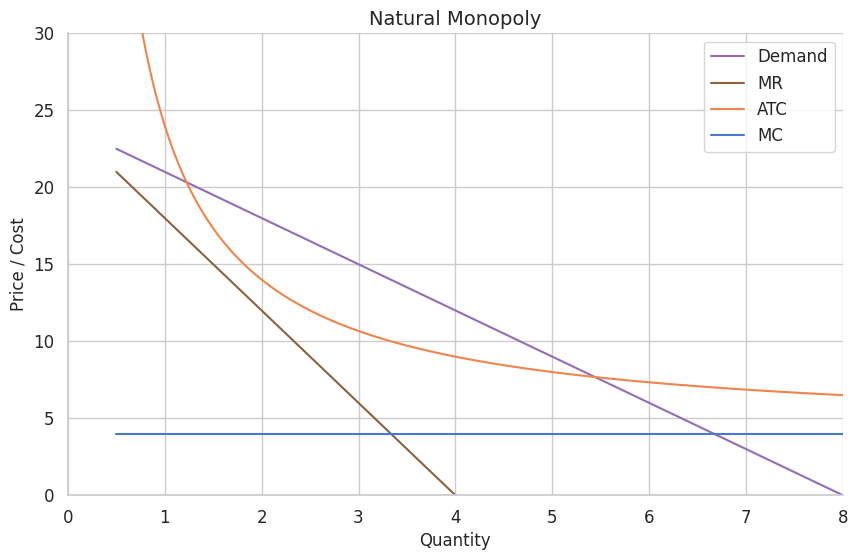

In [7]:
q = np.linspace(0.5, 8, 200)
atc = 20/q + 4
mc = np.full_like(q, 4)
d = 24 - 3*q
mr = 24 - 6*q

plt.figure()
sns.lineplot(x=q, y=d, color=c[4], label='Demand')
sns.lineplot(x=q, y=mr, color=c[5], label='MR')
sns.lineplot(x=q, y=atc, color=c[1], label='ATC')
sns.lineplot(x=q, y=mc, color=c[0], label='MC')

plt.title("Natural Monopoly")
plt.xlabel("Quantity")
plt.ylabel("Price / Cost")
plt.ylim(0, 30)
plt.xlim(0, 8)
plt.show()

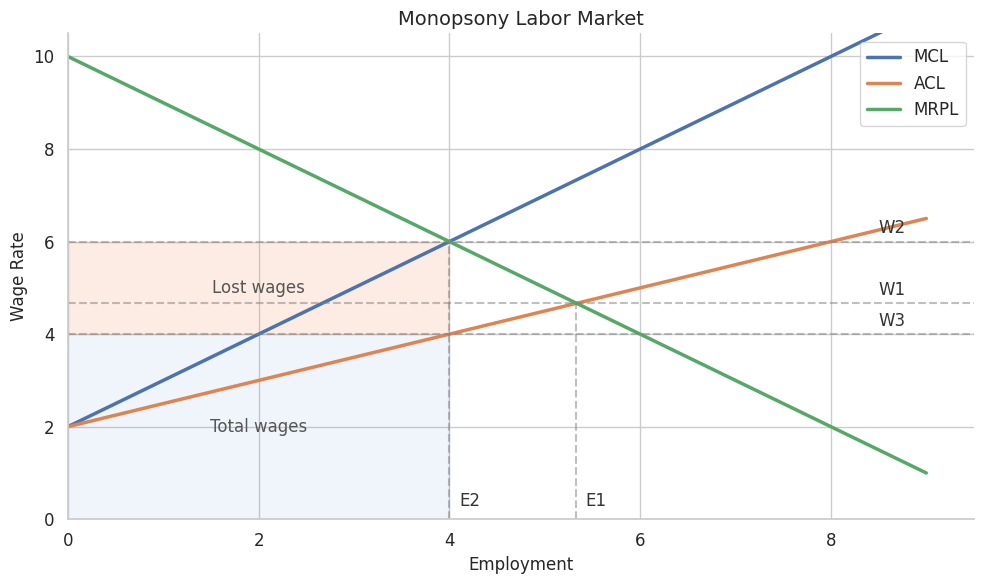

In [14]:
x = np.linspace(0, 9, 100)
df = pd.DataFrame({
    'Employment': x,
    'MCL': 2 + x,
    'ACL': 2 + 0.5 * x,
    'MRPL': 10 - x
})

df_melted = df.melt('Employment', var_name='Curve', value_name='Wage Rate')

e2, w2, w3 = 4, 6, 4
e1, w1 = 5.33, 4.67

fig, ax = plt.subplots()

sns.lineplot(data=df_melted, x='Employment', y='Wage Rate', hue='Curve',
             linewidth=2.5, ax=ax)

ax.set_title("Monopsony Labor Market")

line_kws = {'color': 'gray', 'linestyle': '--', 'alpha': 0.5, 'linewidth': 1.5}
ax.axhline(w2, **line_kws)
ax.axhline(w1, **line_kws)
ax.axhline(w3, **line_kws)

ax.plot([e2, e2], [0, w2], **line_kws)
ax.plot([e1, e1], [0, w1], **line_kws)

text_opts = {'fontsize': 12, 'color': '#333333', 'va': 'bottom'}
ax.text(8.5, w2 + 0.1, "W2", **text_opts)
ax.text(8.5, w1 + 0.1, "W1", **text_opts)
ax.text(8.5, w3 + 0.1, "W3", **text_opts)

ax.text(e2 + 0.1, 0.2, "E2", **text_opts)
ax.text(e1 + 0.1, 0.2, "E1", **text_opts)

ax.fill_between([0, e2], 0, w3, color=c[0], alpha=0.08)
ax.fill_between([0, e2], w3, w2, color=c[1], alpha=0.15)

ax.text(e2/2, w3/2, "Total wages", ha='center', va='center', color='#555555')
ax.text(e2/2, (w2+w3)/2, "Lost wages", ha='center', va='center', color='#555555')

ax.set_xlim(0, 9.5)
ax.set_ylim(0, 10.5)

plt.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()